# Table of Contents
- Import libraries

- Import Data

- Check for Security Implications

- Create region variable and analyse spending habits

- Create low-activity exclusion flag and excluded from data set

- Create customer profiles

- Produce visualisations

- Export final data

# Importing Libraries

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Set the max columns to none
pd.set_option('display.max_columns', None)

# 1. Importing Data

In [4]:
# Define path
path = r'C:\Users\tom\Documents\Career Foundry\2022-05-29 Instacart Basket Analysis'

In [5]:
# Import merged dataframe
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [6]:
# Check shape of imported dataframe
ords_prods_all.shape

(32404859, 28)

# 2. Checking for Security Implications

In [7]:
# Check the output for PII
ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,max_order,loyalty_flag,user_spending,spending_flag,order_frequency,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


The 'first_name' and 'last_name' columns both contain personally identifiable information, and so need to be excluded from the analysis.

In [8]:
# Drop columns containing PII data
df_instacart = ords_prods_all.drop(columns = ['first_name', 'last_name'])

In [9]:
# View new dataframe
df_instacart

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,max_order,loyalty_flag,user_spending,spending_flag,order_frequency,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,156685,106143,26,4,23,5.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,26,Regular customer,10.700000,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755
32404855,484769,66343,1,6,11,NaN,47210,1,0,Fresh Farmed Tilapia Fillet,15,12,8.1,4,New customer,8.100000,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151
32404856,1561557,66343,2,1,11,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,15,12,8.1,4,New customer,8.100000,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151
32404857,276317,66343,3,6,15,19.0,47210,1,1,Fresh Farmed Tilapia Fillet,15,12,8.1,4,New customer,8.100000,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151


# 3.a. Create Region Column

In [10]:
# View state counts in dataframe
df_instacart['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [11]:
# Create list of region labels
region = []

for value in df_instacart['state']:
    if (value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']):
        region.append('Northeast')
    elif (value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']):
        region.append('Midwest')
    elif (value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']):
        region.append('South')
    else:
        region.append('West')

In [12]:
# Check region output
region

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 '

In [13]:
# Add region column to dataframe
df_instacart['region'] = region

In [14]:
# Check region value counts
df_instacart['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

# 3.b. US Regions Spending Habits

In [15]:
# Create crosstab for US regional spending
region_spending_crosstab = pd.crosstab(df_instacart['region'], df_instacart['spending_flag'], dropna = False)

In [16]:
# View crosstab
region_spending_crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155932,7441350
Northeast,108180,5614511
South,209481,10582194
West,160271,8132559


In [17]:
# Find percentages of high spenders per US region
Midwest_high_spenders = (155975 / (155975+7441350)) * 100
Northeast_high_spenders = (108225 / (108225+5614511)) * 100
South_high_spenders = (209691 / (209691+10582194)) * 100
West_high_spenders = (160354 / (160354+8132559)) * 100

In [18]:
Midwest_high_spenders, Northeast_high_spenders, South_high_spenders, West_high_spenders

(2.053025242437305, 1.8911408808653762, 1.9430433144904713, 1.9336269414619447)

Spend is very similar across all regions with Midwest having a slightly higher percentage of high spenders than the other regions.

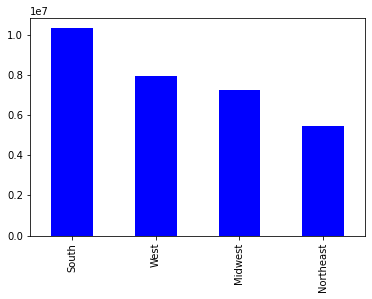

In [61]:
# Create region bar chart 
region_bar = df_normal_activity['region'].value_counts().plot.bar(color =['blue'])

In [ ]:
# Save bar chart as image
region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'region_bar.png'))

# 04. Low-activity Customer Exclusion Flag

In [19]:
# Create low activity flag
df_instacart.loc[df_instacart['max_order'] < 5, 'activity_flag'] = 'Low activity'

In [20]:
# Create normal activity flag
df_instacart.loc[df_instacart['max_order'] >= 5, 'activity_flag'] = 'Normal activity'

In [21]:
# Check the count of activity flag
df_instacart['activity_flag'].value_counts(dropna = False)

Normal activity    30964564
Low activity        1440295
Name: activity_flag, dtype: int64

In [22]:
# Create low activity subset
df_low_activity = df_instacart[df_instacart['activity_flag']=='Low activity']

In [23]:
# Check low activity shape
df_low_activity.shape

(1440295, 28)

In [24]:
# Create normal activity subset
df_normal_activity = df_instacart[df_instacart['activity_flag']=='Normal activity']

In [25]:
# Check normal activity shape
df_normal_activity.shape

(30964564, 28)

In [26]:
# Export low activity subset
df_low_activity.to_pickle(os.path.join(path,'02 Data','Prepared Data','low_activity_customers.pkl'))

# 5. Customer Profiling

# Age

In [27]:
# View Age values
df_normal_activity['age'].value_counts().sort_index()

18    478457
19    496077
20    480194
21    489116
22    490811
       ...  
77    477999
78    471119
79    508337
80    492750
81    485847
Name: age, Length: 64, dtype: int64

In [28]:
# Create 'age' profile
age_profile = []

for value in df_normal_activity['age']:
    if (value >= 18) and (value <= 24):
        age_profile.append('Young Adult')
    elif (value >= 25) and (value <= 64):
        age_profile.append('Adult')
    elif (value >= 65):
        age_profile.append('Senior')

In [29]:
# Assign age profile to column
df_normal_activity['age_profile'] = age_profile

C:\Users\tom\AppData\Local\Temp\ipykernel_32088\2394659017.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal_activity['age_profile'] = age_profile


In [30]:
# View age_profile values
df_normal_activity['age_profile'].value_counts().sort_index()

Adult          19353826
Senior          8195544
Young Adult     3415194
Name: age_profile, dtype: int64

# Income

In [31]:
# View Income values
df_normal_activity['income'].value_counts().sort_index()

25903      20
25911      28
25937      39
25941      31
25955     392
         ... 
584097    826
590790     54
591089    176
592409    318
593901    640
Name: income, Length: 96069, dtype: int64

I have used the this source to define income groups:
https://money.usnews.com/money/personal-finance/family-finance/articles/where-do-i-fall-in-the-american-economic-class-system

In [32]:
# Create 'income' profile
income_profile = []

for value in df_normal_activity['income']:
    if (value < 52200): 
        income_profile.append('Lower income')
    elif (value >= 52200) & (value < 156600):
        income_profile.append('Middle income')
    else:
        income_profile.append('Upper income')

In [33]:
# Assign income profile to column
df_normal_activity['income_profile'] = income_profile

C:\Users\tom\AppData\Local\Temp\ipykernel_32088\2364321213.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal_activity['income_profile'] = income_profile


In [34]:
# View income_profile values
df_normal_activity['income_profile'].value_counts().sort_index()

Lower income      3691708
Middle income    24541333
Upper income      2731523
Name: income_profile, dtype: int64

# Goods

I can use the data in the departments dataset to match up the 'department_id' with each type of goods.

In [35]:
# Create 'goods' profile

goods_profile = []

for value in df_normal_activity['department_id']:
    if value == 1:
        goods_profile.append('Frozen')
    elif value == 2:
        goods_profile.append('Other')
    elif value == 3:
        goods_profile.append('Bakery')
    elif value == 4:
        goods_profile.append('Produce')
    elif value == 5:
        goods_profile.append('Alcohol')
    elif value == 6:
        goods_profile.append('International')
    elif value == 7:
        goods_profile.append('Beverages')
    elif value == 8:
        goods_profile.append('Pets')
    elif value == 9:
        goods_profile.append('Dry goods pasta')
    elif value == 10:
        goods_profile.append('Bulk')
    elif value == 11:
        goods_profile.append('Personal care')
    elif value == 12:
        goods_profile.append('Meat seafood')
    elif value == 13:
        goods_profile.append('Pantry')
    elif value == 14:
        goods_profile.append('Breakfast')
    elif value == 15:
        goods_profile.append('Canned goods')
    elif value == 16:
        goods_profile.append('Dairy eggs')
    elif value == 17:
        goods_profile.append('Household')
    elif value == 18:
        goods_profile.append('Babies')
    elif value == 19:
        goods_profile.append('Snacks')
    elif value == 20:
        goods_profile.append('Deli')
    elif value == 21:
        goods_profile.append('Missing')

In [36]:
# Assign goods profile to column
df_normal_activity['goods_profile'] = goods_profile

C:\Users\tom\AppData\Local\Temp\ipykernel_32088\3339115992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal_activity['goods_profile'] = goods_profile


In [37]:
# View goods profile values
df_normal_activity['goods_profile'].value_counts().sort_index()

Alcohol             144627
Babies              410392
Bakery             1120828
Beverages          2571901
Breakfast           670850
Bulk                 33451
Canned goods       1012074
Dairy eggs         5177182
Deli               1003834
Dry goods pasta     822136
Frozen             2121731
Household           699857
International       255991
Meat seafood        674781
Missing              64768
Other                34411
Pantry             1782705
Personal care       424306
Pets                 93060
Produce            9079273
Snacks             2766406
Name: goods_profile, dtype: int64

# Dependants

In [38]:
# View dependents values
df_normal_activity['number_of_dependants'].value_counts().sort_index()

0    7739681
1    7719106
2    7733261
3    7772516
Name: number_of_dependants, dtype: int64

In [39]:
# Create 'dependants' profile
dependants_profile = []

for value in df_normal_activity['number_of_dependants']:
    if (value == 0): 
        dependants_profile.append('No dependants')
    else:
        dependants_profile.append('Dependants')

In [40]:
# Assign goods profile to column
df_normal_activity['dependants_profile'] = dependants_profile

C:\Users\tom\AppData\Local\Temp\ipykernel_32088\1956120258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal_activity['dependants_profile'] = dependants_profile


In [41]:
# View dependants profile values
df_normal_activity['dependants_profile'].value_counts().sort_index()

Dependants       23224883
No dependants     7739681
Name: dependants_profile, dtype: int64

# Create Customer Profile Variable

In [42]:
# Creating customer profiles
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Young Adult') & (df_normal_activity['income_profile'] == 'Lower income') & (df_normal_activity['dependants_profile'] == 'Dependants'), 'customer_profile'] = 'Young Parent/Guardian lower income'
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Young Adult') & (df_normal_activity['income_profile'] == 'Middle income') & (df_normal_activity['dependants_profile'] == 'Dependants'), 'customer_profile'] = 'Young Parent/Guardian middle income'
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Young Adult') & (df_normal_activity['income_profile'] == 'Upper income') & (df_normal_activity['dependants_profile'] == 'Dependants'), 'customer_profile'] = 'Young Parent/Guardian upper income'
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Young Adult') & (df_normal_activity['income_profile'] == 'Lower income') & (df_normal_activity['dependants_profile'] == 'No dependants'), 'customer_profile'] = 'Young Adult lower income'  
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Young Adult') & (df_normal_activity['income_profile'] == 'Middle income') & (df_normal_activity['dependants_profile'] == 'No dependants'), 'customer_profile'] = 'Young Adult middle income'  
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Young Adult') & (df_normal_activity['income_profile'] == 'Upper income') & (df_normal_activity['dependants_profile'] == 'No dependants'), 'customer_profile'] = 'Young Adult upper income'
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Adult') & (df_normal_activity['income_profile'] == 'Lower income') & (df_normal_activity['dependants_profile'] == 'Dependants'), 'customer_profile'] = 'Parent/Guardian lower income'
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Adult') & (df_normal_activity['income_profile'] == 'Middle income') & (df_normal_activity['dependants_profile'] == 'Dependants'), 'customer_profile'] = 'Parent/Guardian middle income'
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Adult') & (df_normal_activity['income_profile'] == 'Upper income') & (df_normal_activity['dependants_profile'] == 'Dependants'), 'customer_profile'] = 'Parent/Guardian upper income'
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Adult') & (df_normal_activity['income_profile'] == 'Lower income') & (df_normal_activity['dependants_profile'] == 'No dependants'), 'customer_profile'] = 'Adult lower income'  
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Adult') & (df_normal_activity['income_profile'] == 'Middle income') & (df_normal_activity['dependants_profile'] == 'No dependants'), 'customer_profile'] = 'Adult middle income'  
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Adult') & (df_normal_activity['income_profile'] == 'Upper income') & (df_normal_activity['dependants_profile'] == 'No dependants'), 'customer_profile'] = 'Adult upper income'  
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Senior') & (df_normal_activity['income_profile'] == 'Lower income') & (df_normal_activity['dependants_profile'] == 'Dependants'), 'customer_profile'] = 'Senior Parent/Guardian lower income'
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Senior') & (df_normal_activity['income_profile'] == 'Middle income') & (df_normal_activity['dependants_profile'] == 'Dependants'), 'customer_profile'] = 'Senior Parent/Guardian middle income'
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Senior') & (df_normal_activity['income_profile'] == 'Upper income') & (df_normal_activity['dependants_profile'] == 'Dependants'), 'customer_profile'] = 'Senior Parent/Guardian upper income'
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Senior') & (df_normal_activity['income_profile'] == 'Lower income') & (df_normal_activity['dependants_profile'] == 'No dependants'), 'customer_profile'] = 'Senior lower income'  
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Senior') & (df_normal_activity['income_profile'] == 'Middle income') & (df_normal_activity['dependants_profile'] == 'No dependants'), 'customer_profile'] = 'Senior middle income'  
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Senior') & (df_normal_activity['income_profile'] == 'Upper income') & (df_normal_activity['dependants_profile'] == 'No dependants'), 'customer_profile'] = 'Senior upper income'  

C:\Users\tom\AppData\Local\Temp\ipykernel_32088\1544388368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Young Adult') & (df_normal_activity['income_profile'] == 'Lower income') & (df_normal_activity['dependants_profile'] == 'Dependants'), 'customer_profile'] = 'Young Parent/Guardian lower income'


To prevent overcomplicating the profile I have omitted 'goods' from this. If you wanted to provide more in-depth profiling, you could use goods such as 'babies' to identify parents with a young child or 'pets' to show any customers who own a pet.

In [43]:
# View customer profile values
df_normal_activity['customer_profile'].value_counts().sort_index()

Adult lower income                        609387
Adult middle income                      3860037
Adult upper income                        422789
Parent/Guardian lower income             1760852
Parent/Guardian middle income           11495379
Parent/Guardian upper income             1205382
Senior Parent/Guardian lower income       561981
Senior Parent/Guardian middle income     4808014
Senior Parent/Guardian upper income       803591
Senior lower income                       168973
Senior middle income                     1581046
Senior upper income                       271939
Young Adult lower income                  149405
Young Adult middle income                 668546
Young Adult upper income                    7559
Young Parent/Guardian lower income        441110
Young Parent/Guardian middle income      2128311
Young Parent/Guardian upper income         20263
Name: customer_profile, dtype: int64

# 6. Profile Visualisation

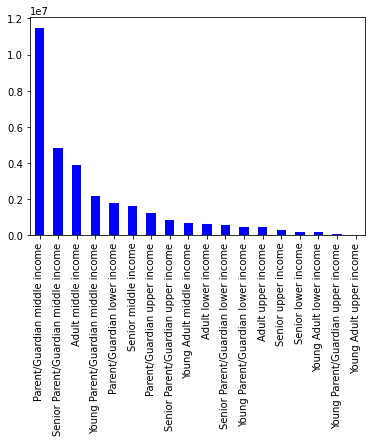

In [44]:
# Create bar chart 
bar = df_normal_activity['customer_profile'].value_counts().plot.bar(color =['blue'])

In [45]:
# Save stacked bar chart as image
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'customer_profile_bar.png'))

Adults without children on a middle income make up the majority of orders, with young parents on an upper income having the least.

# 7. Customer profile aggregation

In [46]:
# Order frequency by customer profile aggregation
df_normal_activity.groupby('customer_profile').agg({'order_frequency': ['mean', 'min', 'max']})

order_frequency           
                                                mean  min   max
customer_profile                                               
Adult lower income                         10.399288  0.0  30.0
Adult middle income                         9.884445  0.0  30.0
Adult upper income                          9.578494  0.0  30.0
Parent/Guardian lower income               10.611834  0.0  30.0
Parent/Guardian middle income               9.914888  0.0  30.0
Parent/Guardian upper income                9.838369  0.0  30.0
Senior Parent/Guardian lower income        10.328843  0.0  30.0
Senior Parent/Guardian middle income        9.932799  0.0  30.0
Senior Parent/Guardian upper income         9.759663  0.0  30.0
Senior lower income                        10.580584  0.0  30.0
Senior middle income                        9.836018  0.5  30.0
Senior upper income                         9.792961  1.0  30.0
Young Adult lower income                   10.214715  0.0  30.0
Young Adult middle income                  10.126979  0.0  30.0
Young Adult upper income                    8.741632  3.0  30.0
Young Parent/Guardian lower income         10.295585  0.0  30.0
Young Parent/Guardian middle income         9.752304  0.0  30.0
Young Parent/Guardian upper income          9.401841  2.0  30.0

In [47]:
# spending by customer profile aggregation
df_normal_activity.groupby('customer_profile').agg({'user_spending': ['mean', 'min', 'max']})

user_spending                         
                                              mean        min           max
customer_profile                                                           
Adult lower income                        6.794283   1.000000     11.487500
Adult middle income                       9.596381   2.382759   5135.893590
Adult upper income                       40.234907   7.002308  15006.940000
Parent/Guardian lower income              6.780940   1.000000     12.000000
Parent/Guardian middle income             9.362381   1.522222   5271.136842
Parent/Guardian upper income             43.883209   7.000000   6983.593023
Senior Parent/Guardian lower income       6.507172   1.262500      7.000000
Senior Parent/Guardian middle income      9.241409   1.300000   2410.696774
Senior Parent/Guardian upper income      29.854363   7.001093   7414.485185
Senior lower income                       6.509028   1.800000      7.000000
Senior middle income                      9.498193   1.308333  14042.512281
Senior upper income                      30.021251   7.000575   2673.245778
Young Adult lower income                  6.968650   2.100000     13.878571
Young Adult middle income                13.507942   7.000000   8794.882427
Young Adult upper income                148.747705  26.759379   2990.717910
Young Parent/Guardian lower income        7.028856   2.000000     11.783333
Young Parent/Guardian middle income      10.565561   7.000000   5668.766038
Young Parent/Guardian upper income      282.162977  25.849554  10209.987755

# 8. Customer Profiles by Regions

In [48]:
# Create customer profile/region crosstab
customer_region_profile = pd.crosstab(df_normal_activity['region'], df_normal_activity['customer_profile'], dropna = False )

In [49]:
# View age profile/region crosstab
customer_region_profile

customer_profile,Adult lower income,Adult middle income,Adult upper income,Parent/Guardian lower income,Parent/Guardian middle income,Parent/Guardian upper income,Senior Parent/Guardian lower income,Senior Parent/Guardian middle income,Senior Parent/Guardian upper income,Senior lower income,Senior middle income,Senior upper income,Young Adult lower income,Young Adult middle income,Young Adult upper income,Young Parent/Guardian lower income,Young Parent/Guardian middle income,Young Parent/Guardian upper income
region,,,,,,,,,,,,,,,,,,
Midwest,138323,931339,100468,421185,2684701,289825,128147,1124343,181475,37535,376791,55755,35362,144149,3094,103910,500498,4613
Northeast,108873,645759,70885,301595,2035886,214090,102573,866574,136821,33386,294343,51110,28008,120511,1607,74049,377293,1322
South,219410,1271271,144230,599578,3809677,393376,185971,1583353,281400,56281,510278,91178,43655,244309,1321,152169,715136,8546
West,142781,1011668,107206,438494,2965115,308091,145290,1233744,203895,41771,399634,73896,42380,159577,1537,110982,535384,5782


In [50]:
# Create marital status/region crosstab
marital_region_profile = pd.crosstab(df_normal_activity['region'], df_normal_activity['marital_status'], dropna = False )

In [51]:
# View marital status/region crosstab
marital_region_profile

marital_status,divorced/widowed,living with parents and siblings,married,single
region,,,,
Midwest,617198,351435,5087262,1205618
Northeast,478767,256430,3853773,875715
South,877314,505457,7223749,1704619
West,671992,367850,5578927,1308458


In [52]:
# Create income profile/goods crosstab
income_goods_profile = pd.crosstab(df_normal_activity['goods_profile'], df_normal_activity['income_profile'], dropna = False )

In [53]:
# View income profile/goods crosstab
income_goods_profile

income_profile,Lower income,Middle income,Upper income
goods_profile,,,
Alcohol,19346,106810,18471
Babies,34026,339345,37021
Bakery,118157,896198,106473
Beverages,413096,1936487,222318
Breakfast,99160,514060,57630
Bulk,5060,25988,2403
Canned goods,88560,829785,93729
Dairy eggs,555091,4159092,462999
Deli,116835,798206,88793


# 9. Crosstab Visualisations

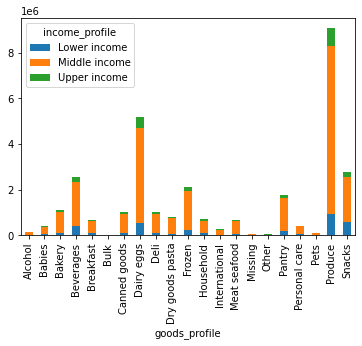

In [54]:
# Plot stacked bar chart of income/goods crosstab
income_goods_profile = income_goods_profile.plot(kind = 'bar', stacked = True)

In [55]:
# Save stacked bar chart as image
income_goods_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'income_goods_bar.png'))

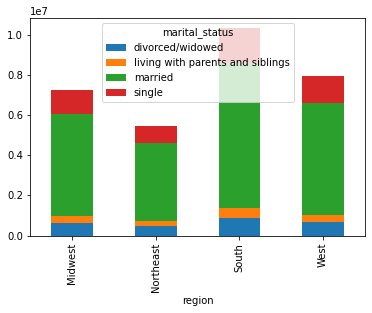

In [56]:
# Plot stacked bar chart of marital status/region crosstab
marital_region_profile = marital_region_profile.plot(kind = 'bar', stacked = True)

In [57]:
# Save stacked bar chart as image
marital_region_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'marital_region_bar.png'))

In [58]:
# Create loyalty spending crosstab
loyalty_distribution = pd.crosstab(df_instacart['loyalty_flag'], df_instacart['spending_flag'], dropna = False)

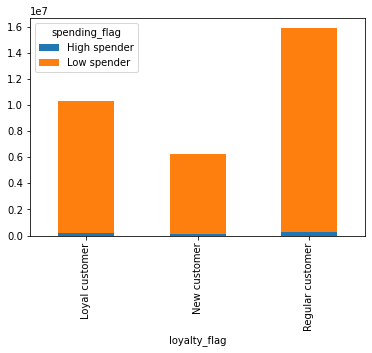

In [59]:
loyalty_distribution_stacked_bar = loyalty_distribution.plot(kind = 'bar', stacked = True)

In [60]:
# Save stacked bar chart as image
loyalty_distribution_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'loyalty_distribution_stacked_bar.png'))

In [62]:
# Create age family status crosstab
age_family_status = pd.crosstab(df_normal_activity['age_profile'], df_normal_activity['marital_status'], dropna = False)

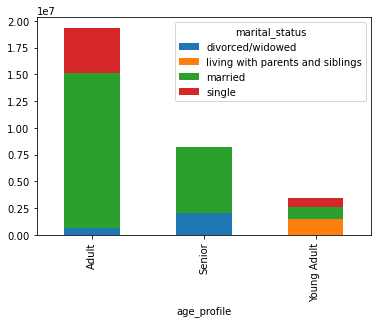

In [63]:
age_family_status_bar = age_family_status.plot(kind = 'bar', stacked = True)

In [64]:
# Save stacked bar chart as image
age_family_status_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'age_family_status_bar.png'))

# 10. Export Data

In [58]:
# Export new dataframe
df_instacart.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart.pkl'))

In [59]:
# Export normal activity subset
df_normal_activity.to_pickle(os.path.join(path,'02 Data','Prepared Data','normal_activity_customers.pkl'))